In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# filepath after cleaning
filepath="/content/drive/MyDrive/Data science&AI/CodingDojo/01-Fundamentals/Week03/Data/sales_predictions_after_cleaning.csv"
df_sales_predictions = pd.read_csv(filepath)

In [3]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Retail_Price,Outlet_Identifier,Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1.0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3.0,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1.0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,3.0,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3.0,Supermarket Type1,994.7052


In [4]:
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Retail_Price          8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Establishment_Year    8523 non-null   int64  
 8   Outlet_Size           8523 non-null   object 
 9   Outlet_Location_Type  8523 non-null   float64
 10  Outlet_Type           8523 non-null   object 
 11  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


##***Histograms to view the distributions of numerical features***##

In [5]:
num_col=df_sales_predictions.select_dtypes('number')
#To show the numeric columns in my data set
num_col

,Item_Weight,Item_Visibility,Retail_Price,Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,1.0,3735.1380
1,5.920,0.019278,48.2692,2009,3.0,443.4228
2,17.500,0.016760,141.6180,1999,1.0,2097.2700
3,19.200,0.000000,182.0950,1998,3.0,732.3800
4,8.930,0.000000,53.8614,1987,3.0,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,3.0,2778.3834
8519,8.380,0.046982,108.1570,2002,2.0,549.2850
8520,10.600,0.035186,85.1224,2004,2.0,1193.1136
8521,7.210,0.145221,103.1332,2009,3.0,1845.5976


Text(0, 0.5, 'Count')

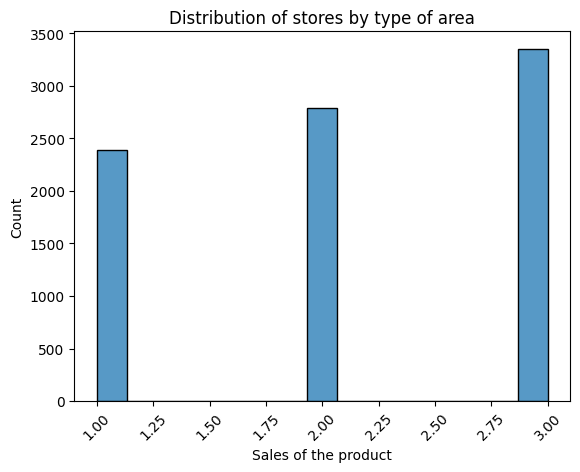

In [6]:
#To create a histogram for Outlet Location_Type
ax = sns.histplot(data=df_sales_predictions, x="Outlet_Location_Type")
ax.tick_params(axis='x', rotation = 45)#rotate xticklabels
ax.ticklabel_format(style='plain')
# Add title and labels
ax.set_title('Distribution of stores by type of area')
ax.set_xlabel('Sales of the product')
ax.set_ylabel('Count')


- The Histogram here shows that most stores are located in a type 3 area

Text(0, 0.5, 'Count')

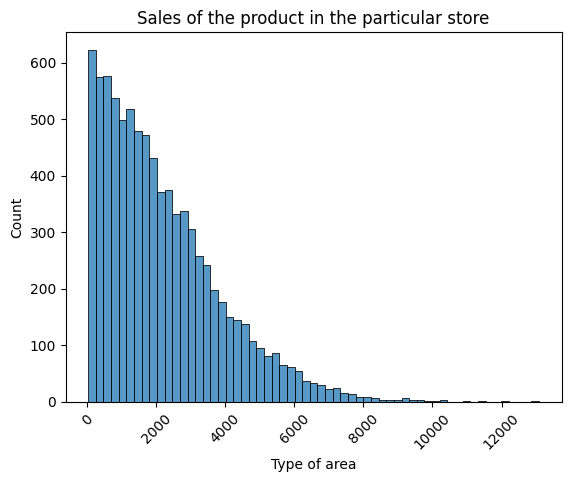

In [7]:
#To create a histogram for Item Outlet Sales
ax = sns.histplot(data=df_sales_predictions, x="Item_Outlet_Sales")
ax.tick_params(axis='x', rotation = 45)#rotate x ticklabels
ax.ticklabel_format(style='plain')
# Add title and labels
ax.set_title('Sales of the product in the particular store')
ax.set_xlabel('Type of area')
ax.set_ylabel('Count')


- The histogram shows the distribution of sales value and frequency

##***Boxplots to view statistical summaries of numerical features***##

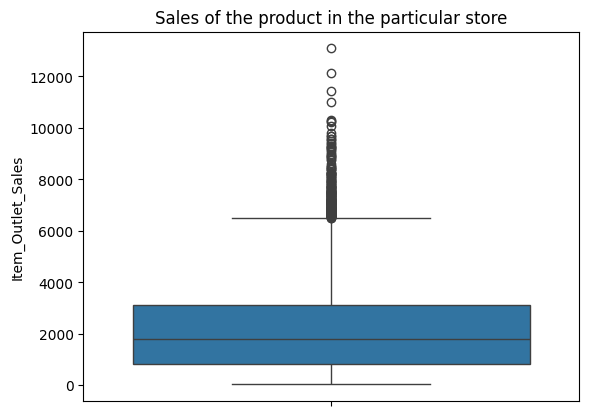

In [10]:
ax = sns.boxplot(data=df_sales_predictions, y="Item_Outlet_Sales")
ax.set_title("Sales of the product in the particular store");

- The median sales in our data set is almost 2000,We have outliers valued at more than 6,000

<ipython-input-11-4e85f6bfd8f1>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


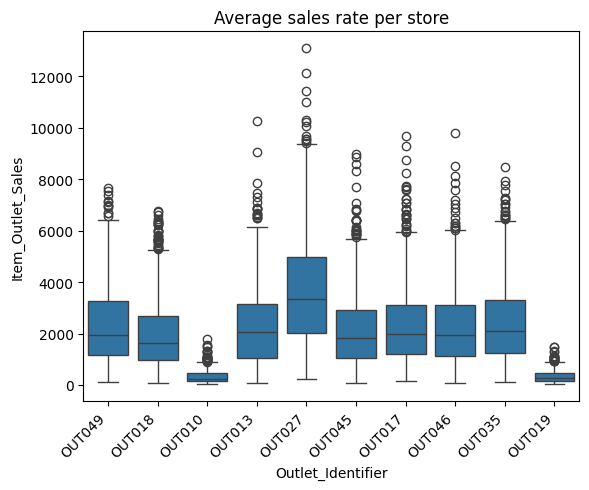

In [11]:
ax = sns.boxplot(data=df_sales_predictions, y="Item_Outlet_Sales",x="Outlet_Identifier")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.set_title("Median sales rate per store");

- The following figure shows a comparison of each store's sales and the median for each of them,It shows that the store with id ="OUT027 " has the highest sales and the two stores"OUT010,OUT019" have the lowest sales, as their sales are close to zero.

##***Countplots to view the frequency of each class of categorial features***##

<ipython-input-19-52c7e12cf0da>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


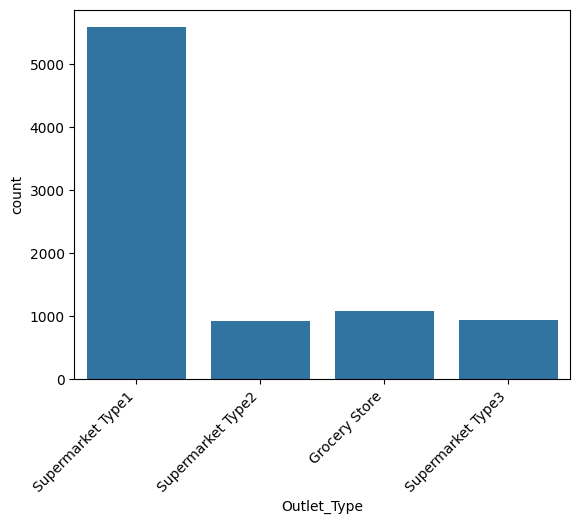

In [19]:
ax = sns.countplot(data=df_sales_predictions,x='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

<ipython-input-23-7fbc892a8330>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


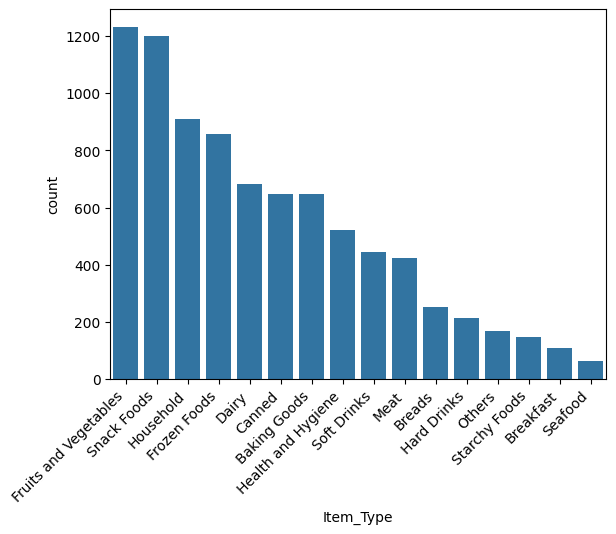

In [23]:
val_counts = df_sales_predictions['Item_Type'].value_counts()
# Creating a Countplot with seaborn (ordered by count)
ax = sns.countplot(data=df_sales_predictions, x="Item_Type",
                   order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


- Here we show in order the categories of the best-selling products, starting from the left with the most consumed categories to the least

<ipython-input-28-95db0951a861>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


Text(0.5, 1.0, 'Distribution according to the size of the store')

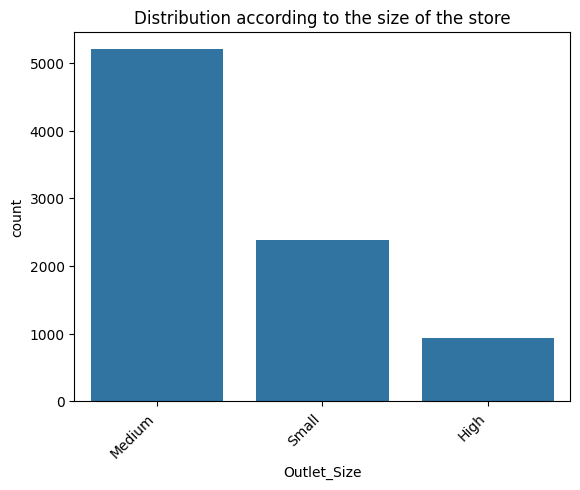

In [28]:
val_counts2 = df_sales_predictions['Outlet_Size'].value_counts()
# Creating a Countplot with seaborn (ordered by count)
ax = sns.countplot(data=df_sales_predictions, x="Outlet_Size",
                   order=val_counts2.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Distribution according to the size of the store')

- It appears here that medium-sized stores are more present

##***Heatmap to view the correlation between features***##


In [33]:
# To get correlations
corr = df_sales_predictions.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Retail_Price,Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.00,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.03,-0.13
Retail_Price,0.03,-0.00,1.00,0.01,0.00,0.57
Establishment_Year,-0.01,-0.07,0.01,1.00,-0.09,-0.05
Outlet_Location_Type,0.00,-0.03,0.00,-0.09,1.00,0.09
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,0.09,1.00


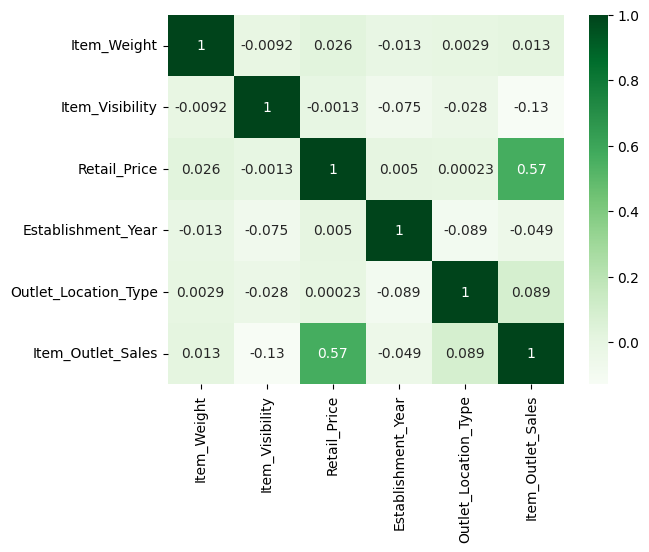

In [36]:
# To make a heatmap of correlations
#sns.heatmap(corr, cmap = 'Greens');
# To Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

- The heatmap makes it easy for us to map the correlation between our columns, the dark colors are a strong positive correlation, as it appears to that there is a strong correlation between the Retail_Price  and Item_Outlet_Sales column.